In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
# Reading dataset
df = pd.read_csv("employee_data2.csv")
# describe the dataset before cleaning
print("before cleaning")
print(df.describe())
# cleaning the data
df.drop_duplicates(inplace=True)
median = df['salary'].median()
df['salary'].fillna(median, inplace=True)
median = df['age'].median()
df['age'].fillna(median, inplace=True)
# after cleaning
print("after cleaning")
print(df.describe())
# reset the index after data cleaning 
# because one-hot encoding maps values by index
df.reset_index(inplace=True, drop=True)

before cleaning
               age       salary
count  1000.000000  1000.000000
mean     41.155000   181.969000
std      13.462995    70.424382
min      18.000000     4.000000
25%      30.000000   129.000000
50%      41.000000   185.000000
75%      53.000000   241.000000
max      64.000000   299.000000
after cleaning
              age      salary
count  912.000000  912.000000
mean    41.209430  181.817982
std     13.461862   70.037702
min     18.000000    4.000000
25%     30.000000  129.000000
50%     42.000000  185.500000
75%     53.000000  241.000000
max     64.000000  299.000000


In [3]:
# adding a new column for age ranges
q_1 = df['age'].quantile(q=0.25) # 30
q_3 = df['age'].quantile(q=0.75) # 53
q_4 = df['age'].max() # 64
df['age_ranges'] = pd.cut(x=df['age'], bins=[0, q_1, q_3, q_4], labels=['young', 'adult', 'old'])
print(df.info())
print(df.groupby(['age_ranges']).mean())
print(df.groupby(['gender']).mean())
print(df.groupby(['education']).mean())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   gender      912 non-null    object  
 1   age         912 non-null    int64   
 2   education   912 non-null    object  
 3   salary      912 non-null    int64   
 4   age_ranges  912 non-null    category
dtypes: category(1), int64(2), object(2)
memory usage: 29.6+ KB
None
                  age      salary
age_ranges                       
young       24.170040   98.356275
adult       42.047085  186.531390
old         58.721461  266.351598
              age      salary
gender                       
female  41.111588  181.251073
male    41.311659  182.410314
                      age      salary
education                            
Assistant Prof  42.517241  222.922414
Associate Prof  59.357513  274.932642
Bacholar        20.967033   75.780220
Master          29.336364  125.695455
PhD            

In [4]:
# since the number of categories in education column is large
# we will apply label encoding 

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(df['education'])
print(integer_encoded)

df["education"].replace(to_replace=df["education"].tolist(), value=integer_encoded, inplace = True)
df.head()

[4 1 1 3 3 0 5 0 5 3 5 0 0 5 5 1 3 0 5 3 1 3 1 1 5 1 1 4 1 2 1 5 1 6 3 1 5
 2 4 1 5 1 1 0 0 0 3 0 0 5 3 3 3 6 1 0 1 5 2 0 1 1 2 4 0 0 3 0 2 3 1 3 2 5
 3 3 1 2 1 5 3 2 1 5 4 1 5 3 1 1 1 3 3 3 5 0 3 3 1 2 0 1 4 4 1 5 1 5 3 5 3
 5 0 0 5 5 3 3 2 5 4 3 3 1 0 1 4 6 1 2 1 1 0 2 2 0 5 0 3 0 4 1 3 3 5 4 0 0
 5 1 1 5 5 3 2 5 0 3 3 5 3 3 4 3 4 5 1 1 5 3 1 2 4 2 3 0 5 4 3 5 1 3 4 2 2
 5 3 3 0 0 4 3 1 6 5 3 5 6 0 5 4 1 3 2 1 2 4 4 2 2 5 3 1 6 5 4 4 5 1 2 3 0
 5 3 3 5 0 1 5 3 1 1 1 5 5 1 0 5 3 1 1 1 3 1 1 4 3 3 6 3 1 3 0 5 1 0 1 2 3
 3 5 1 1 4 5 1 2 0 3 1 5 0 1 5 5 5 5 4 6 0 3 2 3 0 2 4 0 4 5 5 0 3 0 2 2 4
 5 5 4 3 4 5 2 0 1 0 2 3 3 2 1 1 2 0 5 1 3 2 5 4 1 1 1 1 2 1 5 1 1 3 5 4 1
 3 0 5 1 1 3 2 5 4 1 1 5 1 3 3 5 1 3 3 1 0 3 5 1 1 5 2 3 1 5 2 5 1 5 0 3 5
 1 0 3 2 1 3 5 5 1 1 1 0 5 6 1 4 1 5 6 3 2 3 0 2 3 6 3 0 0 5 4 5 3 1 2 1 5
 3 1 5 1 3 0 3 3 5 2 2 5 3 3 5 1 3 1 1 0 1 5 1 3 1 3 5 3 3 6 1 1 3 1 2 3 4
 2 5 3 4 5 4 2 1 4 6 5 1 5 2 5 2 0 3 2 3 1 4 3 3 5 0 1 1 3 5 5 4 1 4 0 2 3
 0 5 0 1 3 2 2 5 4 2 3 3 

,gender,age,education,salary,age_ranges
0,male,36,4,165,adult
1,male,55,1,279,old
2,male,61,1,288,old
3,female,29,3,135,young
4,female,34,3,146,adult


In [5]:
# then we will apply one-hot encoding on gender column
gender_encoded = label_encoder.fit_transform(df['gender'])
gender_reshaped = gender_encoded.reshape(len(gender_encoded), 1)

from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder(sparse=False, handle_unknown='error', drop='first', categories='auto')
gender_onehot_encoded = onehot_encoder.fit_transform(gender_reshaped)

gender_ohe_df = pd.DataFrame(gender_onehot_encoded)
df = df.join(gender_ohe_df)
df = df.rename({0: "male"}, axis=1)
df.drop(columns=['gender'], inplace=True)
print(df)

     age  education  salary age_ranges  male
0     36          4     165      adult   1.0
1     55          1     279        old   1.0
2     61          1     288        old   1.0
3     29          3     135      young   0.0
4     34          3     146      adult   0.0
..   ...        ...     ...        ...   ...
907   33          3     117      adult   0.0
908   21          2      51      young   0.0
909   49          5     192      adult   0.0
910   56          1     270        old   1.0
911   64          1     255        old   0.0

[912 rows x 5 columns]


In [6]:
# then we apply ordinal encoding on the age_ranges column 
age_ranges_dict = {'young': 1, 'adult': 2, 'old': 3}
# setting the new column as int64 to make show in the heatmap below
df['age_ordinal'] = df.age_ranges.map(age_ranges_dict).astype('int64')
df.drop(columns=['age_ranges'], inplace=True)
print(df)

     age  education  salary  male  age_ordinal
0     36          4     165   1.0            2
1     55          1     279   1.0            3
2     61          1     288   1.0            3
3     29          3     135   0.0            1
4     34          3     146   0.0            2
..   ...        ...     ...   ...          ...
907   33          3     117   0.0            2
908   21          2      51   0.0            1
909   49          5     192   0.0            2
910   56          1     270   1.0            3
911   64          1     255   0.0            3

[912 rows x 5 columns]


                  age  education    salary      male  age_ordinal
age          1.000000  -0.191985  0.911063  0.007433     0.917928
education   -0.191985   1.000000 -0.397876 -0.042778    -0.275005
salary       0.911063  -0.397876  1.000000  0.008278     0.858230
male         0.007433  -0.042778  0.008278  1.000000     0.017486
age_ordinal  0.917928  -0.275005  0.858230  0.017486     1.000000


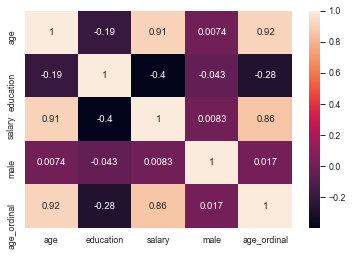

In [7]:
# set the general style of the plots
sns.set(style='white', context='paper', palette='deep')
# print the Correlation matrix
corr_matrix = df.corr()
print(corr_matrix)
# Visualizing correlation matrix
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [8]:
# print the correlation coefficient from the matrix
corr_coef = np.corrcoef(df["salary"], df["age_ordinal"])[0, 1]
print("Correlation between salary and age_ordinal:", round(corr_coef, 2))

# with t-test we check if the mean of the two groups are truly different
ttest, pval = stats.ttest_ind(df["salary"], df["age_ordinal"])
print("Independent t-test 0:", ttest, pval)

Correlation between salary and age_ordinal: 0.86
Independent t-test 0: 77.54435639277493 0.0


Text(0.5, 1.0, 'Independent T-Test')

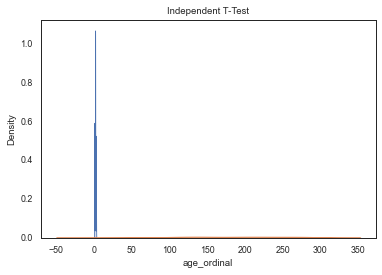

In [9]:
sns.kdeplot(df["age_ordinal"], shade=True)
sns.kdeplot(df["salary"], shade=True)
plt.title("Independent T-Test")

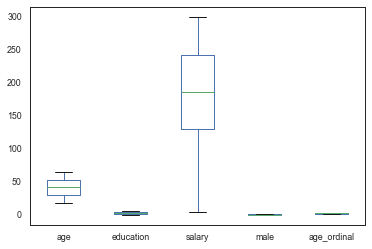

In [10]:
#Boxplot graph of all columns
df.plot(kind='box')
plt.show()

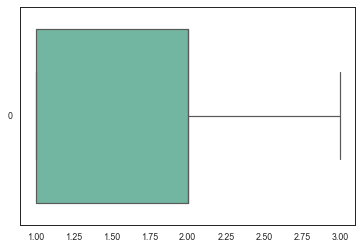

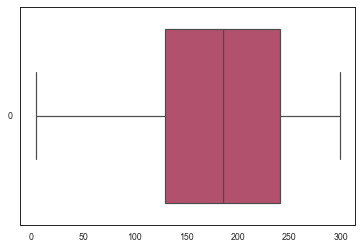

In [11]:
#Distribution of data in each class
cals_ord = df["age_ordinal"]
durs = df["salary"]

ax = sns.boxplot(data=cals_ord, orient="h", palette="Set2")
plt.show()
ax = sns.boxplot(data=durs, orient="h", palette="flare")
plt.show()

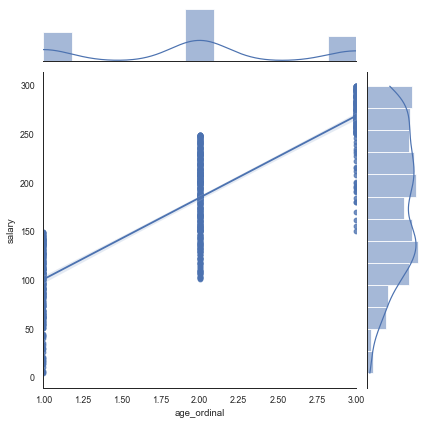

In [12]:
#Analysing correlation between Calories and Duration
sns.jointplot(kind="reg", x="age_ordinal", y="salary", data=df)
plt.show()